## Truc a faire:

- Model de la derniere seance de fouille de données a tester
- Model de clustering a tester
- a voir pour tester des auto encodeur



In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive

# # Montez Google Drive
# drive.mount('/content/drive')

In [3]:
os.listdir('data')

['guillaume.txt']

In [4]:
PATH = 'data/guillaume.txt'

In [5]:
df=pd.read_csv(PATH,sep=";",decimal=",")

/var/folders/1p/fh_mwjqj47d8zs3rgk2kvbnm0000gn/T/ipykernel_56976/789356330.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(PATH,sep=";",decimal=",")


In [6]:
df.drop(columns=["CodeDecision","ZIBZIN"],inplace=True)

In [7]:
# df

In [8]:
df.drop(1956360,inplace=True)

In [9]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], yearfirst=True)

# Création de trois nouvelles colonnes : Année, Mois, Jour
df['Année'] = df['DateTransaction'].dt.year
df['Mois'] = df['DateTransaction'].dt.month
df['Jour'] = df['DateTransaction'].dt.day

# Création de trois nouvelles colonnes : Heure, Minute, Seconde
df['Heure'] = df['DateTransaction'].dt.hour
df['Minute'] = df['DateTransaction'].dt.minute
df['Seconde'] = df['DateTransaction'].dt.second

In [10]:
df.iloc[1956360]

IDAvisAutorisationCheque               78643047
FlagImpaye                                    0
Montant                      54,289999999999999
DateTransaction             2017-02-01 07:48:48
VerifianceCPT1                                1
VerifianceCPT2                                1
VerifianceCPT3                                1
D2CB                                        267
ScoringFP1                                    0
ScoringFP2                                    0
ScoringFP3                                    0
TauxImpNb_RB                 110,05692599620494
TauxImpNB_CPM                53,554233554497365
EcartNumCheq                                  0
NbrMagasin3J                                  1
DiffDateTr1                                   4
DiffDateTr2                                   4
DiffDateTr3                                   4
CA3TRetMtt                   54,289999999999999
CA3TR                                         0
Heure                                   

In [11]:
y=df.FlagImpaye

In [12]:
ytmp=y.astype(int)

In [13]:
ytmp.value_counts()

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64

(array([4616778.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   29995.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

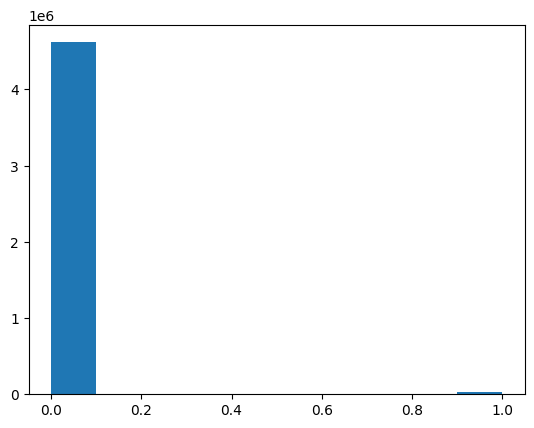

In [14]:
import matplotlib.pyplot as plt
plt.hist(ytmp)

In [15]:
y=y.astype(bool)

In [16]:
df.drop(columns=["FlagImpaye","DateTransaction"],inplace=True)

In [17]:
# df

In [18]:
df["ScoringFP1"]=df["ScoringFP1"].replace(',', '.', regex=True)
df["ScoringFP2"]=df["ScoringFP2"].replace(',', '.', regex=True)
df["ScoringFP3"]=df["ScoringFP3"].replace(',', '.', regex=True)
df["Montant"]=df["Montant"].replace(',', '.', regex=True)
df["TauxImpNb_RB"]=df["TauxImpNb_RB"].replace(',', '.', regex=True)
df["TauxImpNB_CPM"]=df["TauxImpNB_CPM"].replace(',', '.', regex=True)
df["DiffDateTr1"]=df["DiffDateTr1"].replace(',', '.', regex=True)
df["DiffDateTr2"]=df["DiffDateTr2"].replace(',', '.', regex=True)
df["DiffDateTr3"]=df["DiffDateTr3"].replace(',', '.', regex=True)
df["CA3TRetMtt"]=df["CA3TRetMtt"].replace(',', '.', regex=True)
df["CA3TR"]=df["CA3TR"].replace(',', '.', regex=True)

In [19]:
result = df[(df['Mois'] == 9) & (df['Jour'] == 1)]

In [20]:
result


,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
3899363,83140472,60.0,0,0,0,302,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,60.0,0.0,7,2017,9,1,34,17
3899364,83140475,25.0,0,0,0,547,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,25.0,0.0,8,2017,9,1,6,17
3899365,83140477,32.0,0,0,0,152,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,32.0,0.0,8,2017,9,1,8,3
3899366,83140480,20.88,0,0,0,393,0.00759,0.182221,0.002092,45.14268,34.118277,4,1,0.573461,0.998206,1.539155,92.39,71.51,8,2017,9,1,9,3
3899367,83140481,20.21,0,0,0,152,0.018994,-1.024399,0.005682,45.368313,52.076034,0,1,4.0,4.0,4.0,20.21,0.0,8,2017,9,1,11,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910725,83168536,62.7,0,0,0,1,62.7,0.105322,0.582942,39.99059,17.579748,0,1,5.0,5.0,5.0,62.7,0.0,21,2017,9,1,53,57
3910726,83168537,278.35,0,0,0,1,8.434848,-0.929372,0.799228,45.368313,52.076034,0,1,5.0,5.0,5.0,278.35,0.0,21,2017,9,1,58,31
3910727,83168538,66.96,0,0,0,1,5.150769,-4.358045,0.777725,35.143209,50.882565,0,1,5.0,5.0,5.0,66.96,0.0,22,2017,9,1,2,36
3910728,83168539,30.35,0,0,0,1,10.116667,0.497221,0.490808,44.642857,37.586887,0,1,5.0,5.0,5.0,30.35,0.0,22,2017,9,1,4,11


In [21]:
tmp=3899363

In [22]:
X_train=df.loc[df.index < tmp]
X_test=df.loc[df.index >= tmp]

y_train=y.loc[y.index < tmp]
y_test=y.loc[y.index >= tmp]

In [23]:
# X_train = train.loc[:, train.columns != 'FlagImpaye']
# y_train= train.loc[:, train.columns == 'FlagImpaye']

# X_test = test.loc[:, test.columns != 'FlagImpaye']
# y_test = test.loc[:, test.columns == 'FlagImpaye']

In [24]:
y_train.value_counts()

FlagImpaye
False    3843313
True       56049
Name: count, dtype: int64

### Sampling

In [25]:
# from imblearn.under_sampling import CondensedNearestNeighbour
# cnn = CondensedNearestNeighbour(sampling_strategy="majority")
# X_res, y_res = cnn.fit_resample(df, y)
# X_res

In [26]:
# df

In [27]:
# result = df[(df['Mois'] == 9) & (df['Jour'] == 1)]

In [28]:
# result

In [29]:
y_train.value_counts()

FlagImpaye
False    3843313
True       56049
Name: count, dtype: int64

In [30]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=1, sampling_strategy= 0.02)
X_res, y_res = sme.fit_resample(X_train, y_train)
X_res# 

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,52.076034,0.0,1.0,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.11828,52.076034,0.0,1.0,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
2,78643048.0,26.9,0.0,0.0,0.0,549.0,0.003769,8.586333,0.001192,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
3,78643049.0,42.51,0.0,0.0,0.0,523.0,0.0,0.0,0.0,24.223058,27.448962,0.0,1.0,4.0,4.0,4.0,42.51,0.0,8,2017,2,1,13,53
4,78643050.0,50.84,0.0,0.0,0.0,551.0,0.006151,12.929167,0.001146,44.775178,52.076034,0.0,1.0,4.0,4.0,4.0,50.84,0.0,8,2017,2,1,18,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794415,80620265.953434,24.419156,0.0,0.0,0.0,548.209313,0.000529,0.477888,0.000118,38.297261,33.569237,0.0,1.0,4.0,4.0,4.0,24.419156,0.0,10,2017,5,5,46,36
3794416,80608009.08177,158.084358,0.0,0.0,0.0,541.134584,0.018997,-1.196201,0.001678,25.063178,22.589443,0.0,1.0,4.0,4.0,4.0,158.084358,0.0,16,2017,5,4,41,9
3794417,80223101.371165,78.27,1.87849,1.87849,2.87849,544.0,0.004796,-24.953633,0.001698,55.675249,36.813027,0.87849,1.0,0.489142,4.0,4.0,147.029388,68.759388,19,2017,4,15,26,31
3794418,80608181.03867,78.271596,0.0,0.0,0.0,538.160222,0.007712,5.853265,0.001298,45.368313,52.076034,0.0,1.0,4.0,4.0,4.0,78.271596,0.0,16,2017,5,4,45,38


In [31]:
X_res.to_csv("X.csv")
y_res.to_csv("y.csv")

In [32]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy="majority")
# X_res, y_res = tl.fit_resample(df, y)
# X_res

In [33]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsm= BorderlineSMOTE(random_state=42, sampling_strategy= 0.01)
# X_res, y_res = bsm.fit_resample(X_res, y_res)
# X_res

In [34]:
# neg, pos = y_res.value_counts()
# pourcentage = pos / neg *100
# pourcentage

In [35]:
# X=pd.read_csv("X.csv")
# y=pd.read_csv("y.csv")

In [36]:
y_res

0          False
1          False
2          False
3          False
4          False
           ...  
3794415     True
3794416     True
3794417     True
3794418     True
3794419     True
Name: FlagImpaye, Length: 3794420, dtype: bool

In [37]:
X_res

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,52.076034,0.0,1.0,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.11828,52.076034,0.0,1.0,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
2,78643048.0,26.9,0.0,0.0,0.0,549.0,0.003769,8.586333,0.001192,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
3,78643049.0,42.51,0.0,0.0,0.0,523.0,0.0,0.0,0.0,24.223058,27.448962,0.0,1.0,4.0,4.0,4.0,42.51,0.0,8,2017,2,1,13,53
4,78643050.0,50.84,0.0,0.0,0.0,551.0,0.006151,12.929167,0.001146,44.775178,52.076034,0.0,1.0,4.0,4.0,4.0,50.84,0.0,8,2017,2,1,18,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794415,80620265.953434,24.419156,0.0,0.0,0.0,548.209313,0.000529,0.477888,0.000118,38.297261,33.569237,0.0,1.0,4.0,4.0,4.0,24.419156,0.0,10,2017,5,5,46,36
3794416,80608009.08177,158.084358,0.0,0.0,0.0,541.134584,0.018997,-1.196201,0.001678,25.063178,22.589443,0.0,1.0,4.0,4.0,4.0,158.084358,0.0,16,2017,5,4,41,9
3794417,80223101.371165,78.27,1.87849,1.87849,2.87849,544.0,0.004796,-24.953633,0.001698,55.675249,36.813027,0.87849,1.0,0.489142,4.0,4.0,147.029388,68.759388,19,2017,4,15,26,31
3794418,80608181.03867,78.271596,0.0,0.0,0.0,538.160222,0.007712,5.853265,0.001298,45.368313,52.076034,0.0,1.0,4.0,4.0,4.0,78.271596,0.0,16,2017,5,4,45,38


In [38]:
# X.drop(columns=["Unnamed: 0"],inplace=True)

In [39]:
# X.to_csv("tmp.csv",sep=";",index=False)

In [40]:
# print(y.value_counts())
# neg, pos = y.value_counts()
# pourcentage = pos / neg *100
# pourcentage

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 8, 10]
}

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=8, min_samples_split=10, sc)

# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
rf_classifier.fit(X_res, y_res)


predictions = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

0.9912069798276986


In [44]:
prediction = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

In [45]:
print(accuracy)

0.9912069798276986


In [46]:
f1_score(y_test,prediction)

0.000304228780042592

In [47]:
# X_res.to_csv("X.csv")
# y_res.to_csv("y.csv")

## Arbre de decision

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='f1')

grid_search.fit(X_res, y_res)

best_params = grid_search.best_params_
best_decision_tree_classifier = grid_search.best_estimator_

predictions = best_decision_tree_classifier.predict(X_test)

accuracy_score(predictions,y_test)


0.9912056418757551

In [79]:
f1_score(y_test,predictions)

0.0015190642564180464

## Deep learning

In [80]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.initializers import Constant

from tensorflow import keras

import tensorflow as tf

In [81]:
neg, pos = np.bincount(y)

In [82]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [83]:
X_train.columns

RangeIndex(start=0, stop=24, step=1)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Centrer et réduire les colonnes du DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [85]:
output_bias=np.log([pos/neg])

In [86]:
output_bias

array([-4.29324354])

In [87]:
# A modif ça marche pas
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      keras.metrics.F1Score(name="f1_score") #Erreur ici
]

In [88]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [89]:
output_bias

In [90]:
inputs=Input((X_train.shape[1]))


d1 = Dense(16, activation='relu')(inputs)
d1 = Dropout(0.3)(d1)

outputs=Dense(1, activation='sigmoid', bias_initializer=output_bias)(d1)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
X_res=X_res.astype("float32")

In [92]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(X_res, y_res, validation_split=0.1, batch_size=200, epochs=800, callbacks=callbacks_list)

Epoch 1/800
17069/17075 [============================>.] - ETA: 0s - loss: 11297.3203 - accuracy: 0.9980
Epoch 1: val_loss improved from inf to 1998900.37500, saving model to model.h5
17075/17075 [==============================] - 48s 3ms/step - loss: 11293.4238 - accuracy: 0.9980 - val_loss: 1998900.3750 - val_accuracy: 0.9422
Epoch 2/800
   44/17075 [..............................] - ETA: 46s - loss: 8.6596e-06 - accuracy: 1.0000

/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17071/17075 [============================>.] - ETA: 0s - loss: 1.3535e-06 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 1998900.37500
17075/17075 [==============================] - 42s 2ms/step - loss: 1.3532e-06 - accuracy: 1.0000 - val_loss: 1998900.5000 - val_accuracy: 0.9422
Epoch 3/800
17075/17075 [==============================] - ETA: 0s - loss: 1.2058e-08 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 1998900.37500
17075/17075 [==============================] - 44s 3ms/step - loss: 1.2058e-08 - accuracy: 1.0000 - val_loss: 1998900.6250 - val_accuracy: 0.9422
Epoch 4/800
17054/17075 [============================>.] - ETA: 0s - loss: 3.9873e-09 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 1998900.37500
17075/17075 [==============================] - 41s 2ms/step - loss: 3.9860e-09 - accuracy: 1.0000 - val_loss: 1998900.6250 - val_accuracy: 0.9422
Epoch 5/800
17055/17075 [============================>.] - ETA: 0s - loss: 2.4006e-09 - accuracy: 1.

In [93]:
# use the best epoch
model.load_weights('model.h5')

In [94]:
X_test.dtypes

IDAvisAutorisationCheque    float64
Montant                     float64
VerifianceCPT1              float64
VerifianceCPT2              float64
VerifianceCPT3              float64
D2CB                        float64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                float64
NbrMagasin3J                float64
DiffDateTr1                 float64
DiffDateTr2                 float64
DiffDateTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                       float64
Année                       float64
Mois                        float64
Jour                        float64
Minute                      float64
Seconde                     float64
dtype: object

In [95]:
X_test = X_test.astype(float)

In [96]:
test_preds = model.predict(X_test)

23357/23357 [==============================] - 39s 2ms/step


In [97]:
accuracy_score(test_preds,y_test)

0.9912056418757551

In [98]:
from sklearn.metrics import f1_score

In [99]:
tst=test_preds[:,0].astype(int)

In [100]:
tst=tst.tolist()

In [101]:
y_test.tolist()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [102]:
tst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [103]:
f1_score(y_test.astype(int),tst)

0.0